In [2]:
import numpy as np
import pandas as pd
import glob
import os
folder_path = 'C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\train_data' 
txt_files = glob.glob(os.path.join(folder_path, '*.txt'))
# 遍历找到的.txt文件
classification_image = []
dic = {}
for file in txt_files:
    with open(file, 'r') as file:
        first_line = file.readline().strip()  # 读取第一行并去除换行符
        tmp = first_line.split(',')
        classification_image.append(int(tmp[-1].strip()))
        if int(tmp[-1].strip()) not in dic.keys():
            dic[int(tmp[-1].strip())]=1
        else:
            dic[int(tmp[-1].strip())]+=1
print(dic)
print(len(classification_image))

{0: 214, 2: 277, 21: 652, 22: 376, 23: 309, 24: 318, 3: 84, 25: 549, 26: 320, 4: 451, 16: 386, 27: 488, 36: 223, 28: 377, 29: 416, 30: 319, 31: 406, 32: 293, 35: 361, 33: 323, 34: 395, 5: 288, 37: 322, 38: 387, 39: 436, 6: 388, 7: 361, 8: 358, 9: 427, 1: 370, 10: 384, 18: 364, 11: 711, 12: 323, 13: 408, 14: 355, 15: 419, 17: 308, 19: 312, 20: 225}
14683


In [3]:
from collections import OrderedDict
sorted_dict = OrderedDict(sorted(dic.items()))

print(sorted_dict)

OrderedDict([(0, 214), (1, 370), (2, 277), (3, 84), (4, 451), (5, 288), (6, 388), (7, 361), (8, 358), (9, 427), (10, 384), (11, 711), (12, 323), (13, 408), (14, 355), (15, 419), (16, 386), (17, 308), (18, 364), (19, 312), (20, 225), (21, 652), (22, 376), (23, 309), (24, 318), (25, 549), (26, 320), (27, 488), (28, 377), (29, 416), (30, 319), (31, 406), (32, 293), (33, 323), (34, 395), (35, 361), (36, 223), (37, 322), (38, 387), (39, 436)])


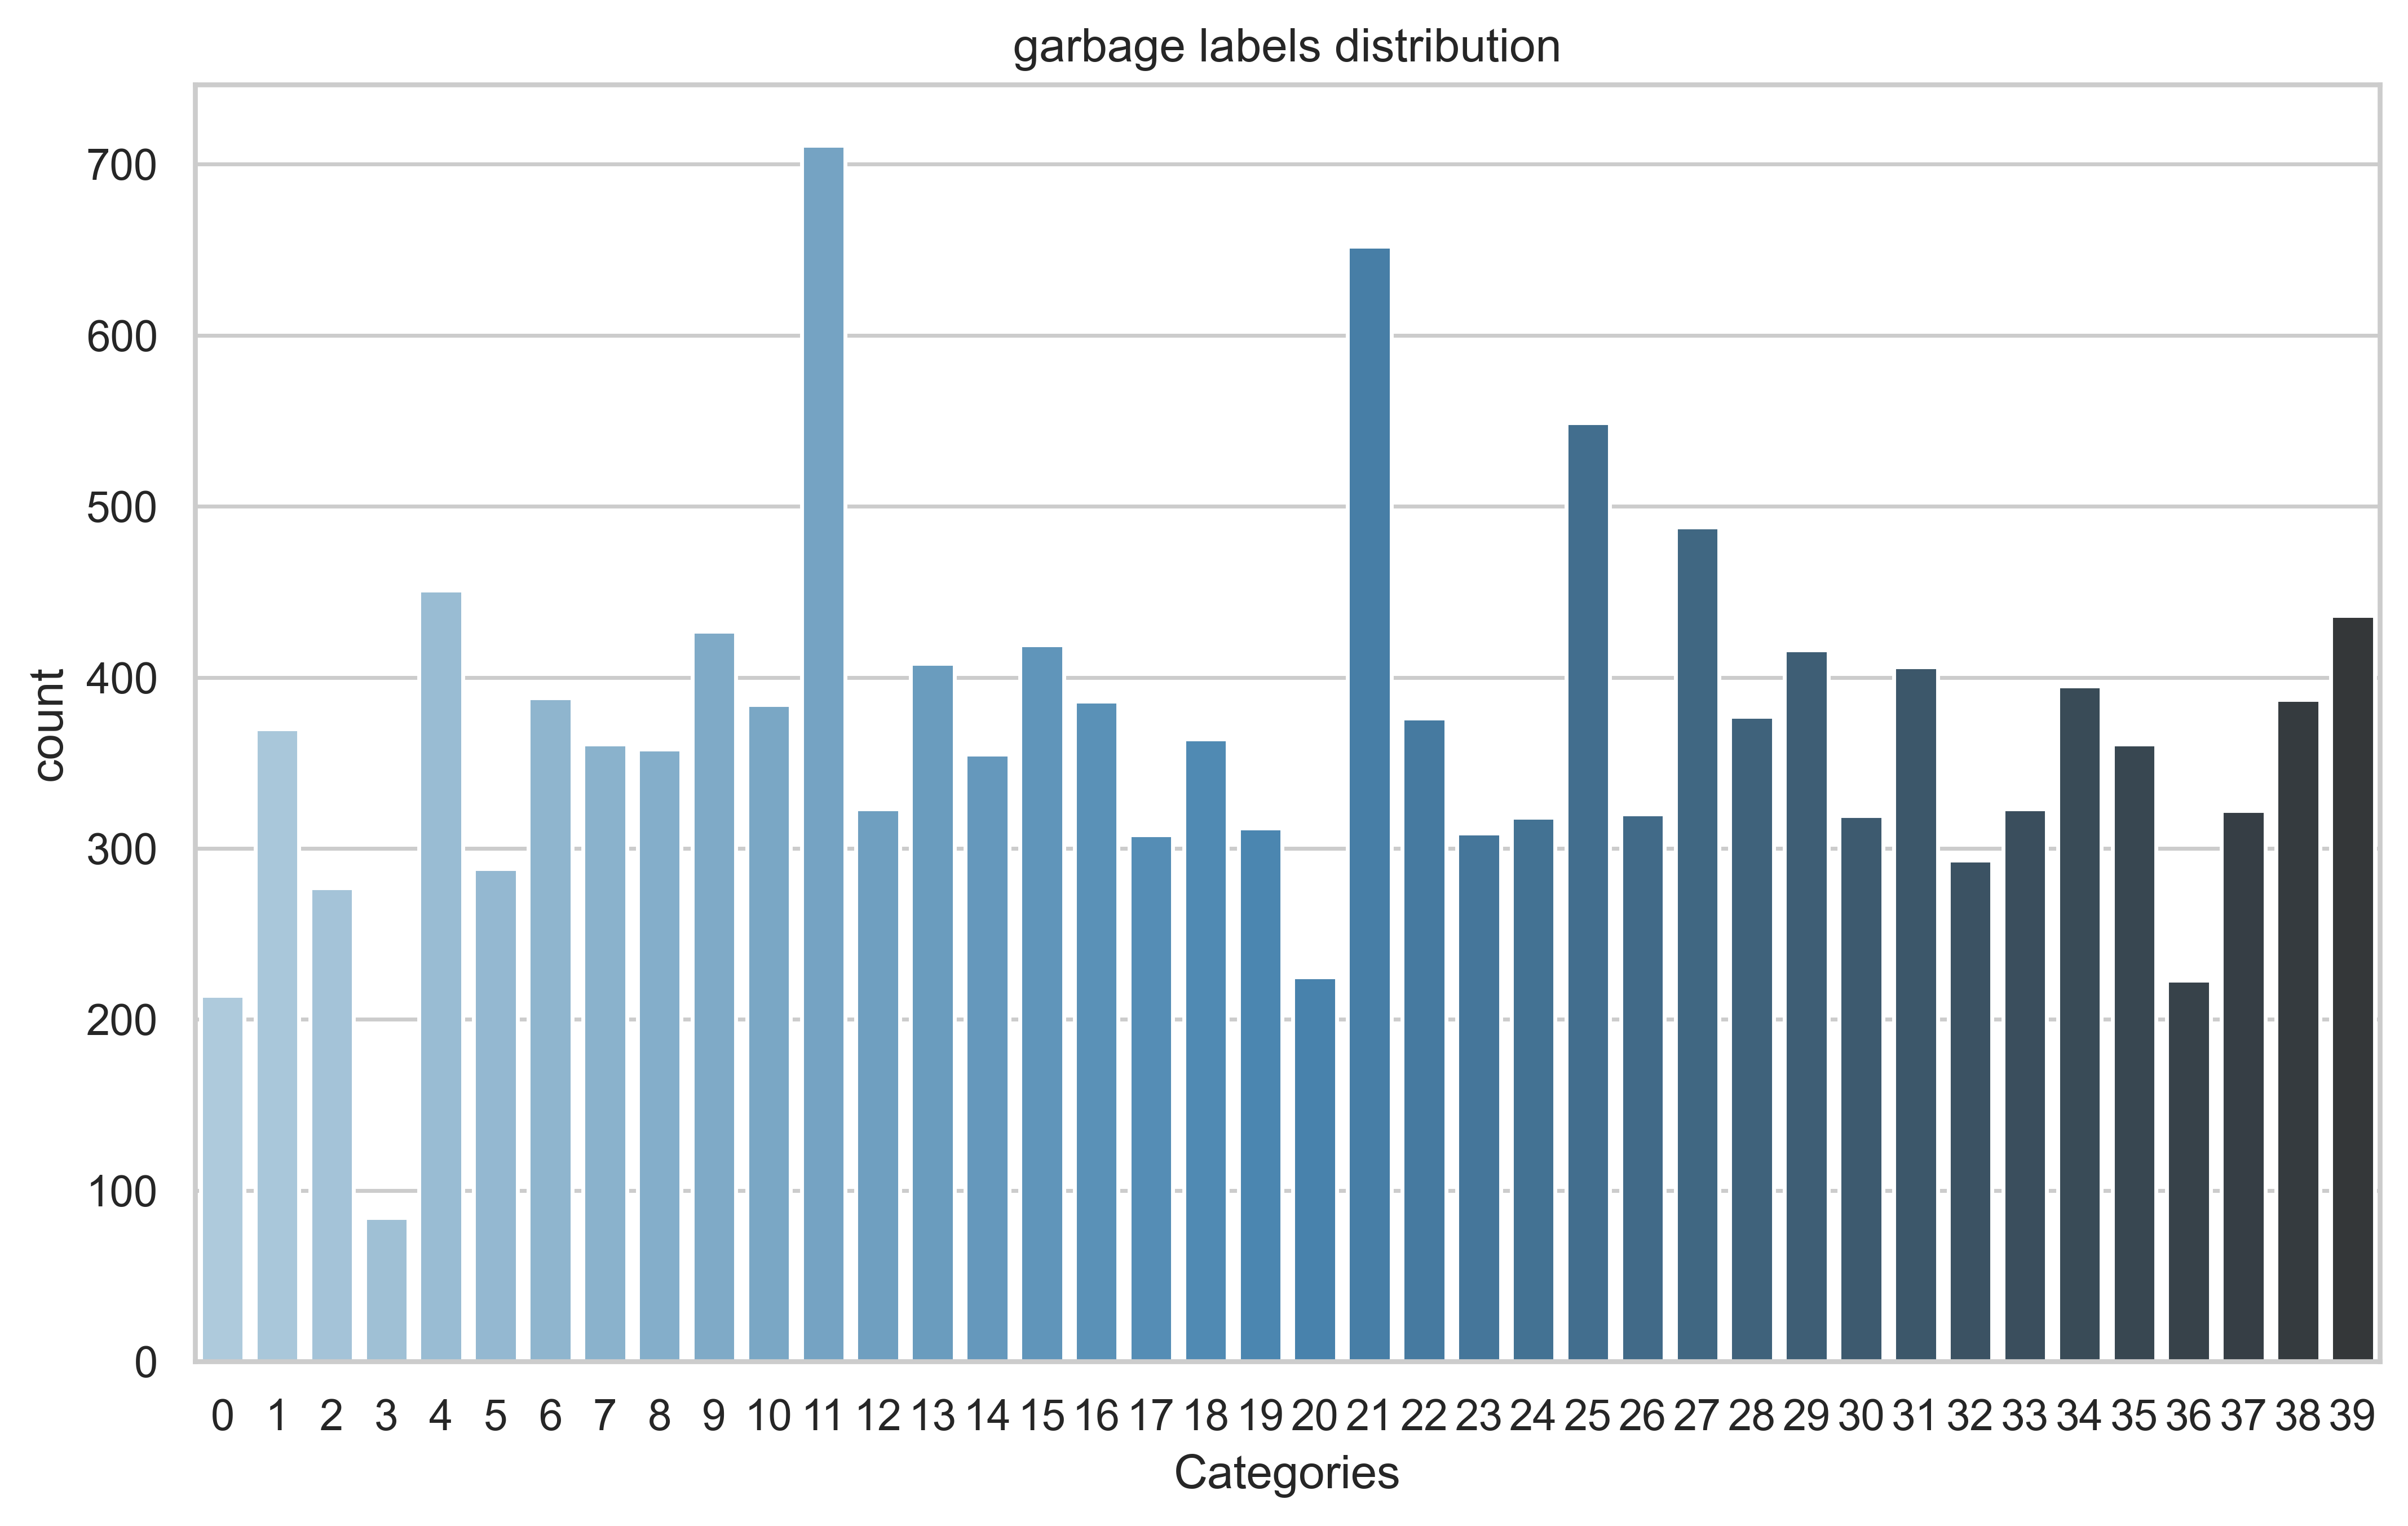

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")  # 设置绘图样式
plt.figure(figsize=(10, 6),dpi=500)  # 设置图形大小
sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()), palette="Blues_d")  # 创建条形图

# 添加标签和标题
plt.xlabel("Categories")
plt.ylabel("count")
plt.title("garbage labels distribution")
plt.savefig('garbage_labels.jpg')
# 显示图形
plt.show()



In [6]:
from PIL import Image
import os
older_path = 'C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\train_data'  # 请将'/your/folder/path'替换为您要操作的文件夹的实际路径

# 获取文件夹中所有.jpg文件
jpg_files = [file for file in os.listdir(folder_path) if file.endswith(".jpg")]

percentage = []
dic = {}
# 遍历.jpg文件并获取尺寸
for jpg_file in jpg_files:
    file_path = os.path.join(folder_path, jpg_file)
    with Image.open(file_path) as img:
        width, height = img.size
        percentage.append(round(height/width,1))
        if round(height/width,1) not in dic.keys():
            dic[round(height/width,1)]=1
        else:
            dic[round(height/width,1)]+=1
        #print(f"File: {jpg_file}, Width: {width}, Height: {height}")
sorted_dict = OrderedDict(sorted(dic.items()))
print(sorted_dict)

OrderedDict([(0.2, 1), (0.3, 10), (0.4, 62), (0.5, 287), (0.6, 1353), (0.7, 2039), (0.8, 2078), (0.9, 793), (1.0, 1599), (1.1, 409), (1.2, 582), (1.3, 2789), (1.4, 276), (1.5, 202), (1.6, 133), (1.7, 172), (1.8, 1375), (1.9, 71), (2.0, 131), (2.1, 91), (2.2, 53), (2.3, 19), (2.4, 26), (2.5, 25), (2.6, 23), (2.7, 18), (2.8, 10), (2.9, 15), (3.0, 6), (3.1, 1), (3.2, 8), (3.3, 8), (3.4, 3), (3.5, 1), (3.6, 3), (3.7, 1), (3.9, 2), (4.1, 1), (4.2, 2), (4.3, 2), (4.4, 2), (4.9, 1)])


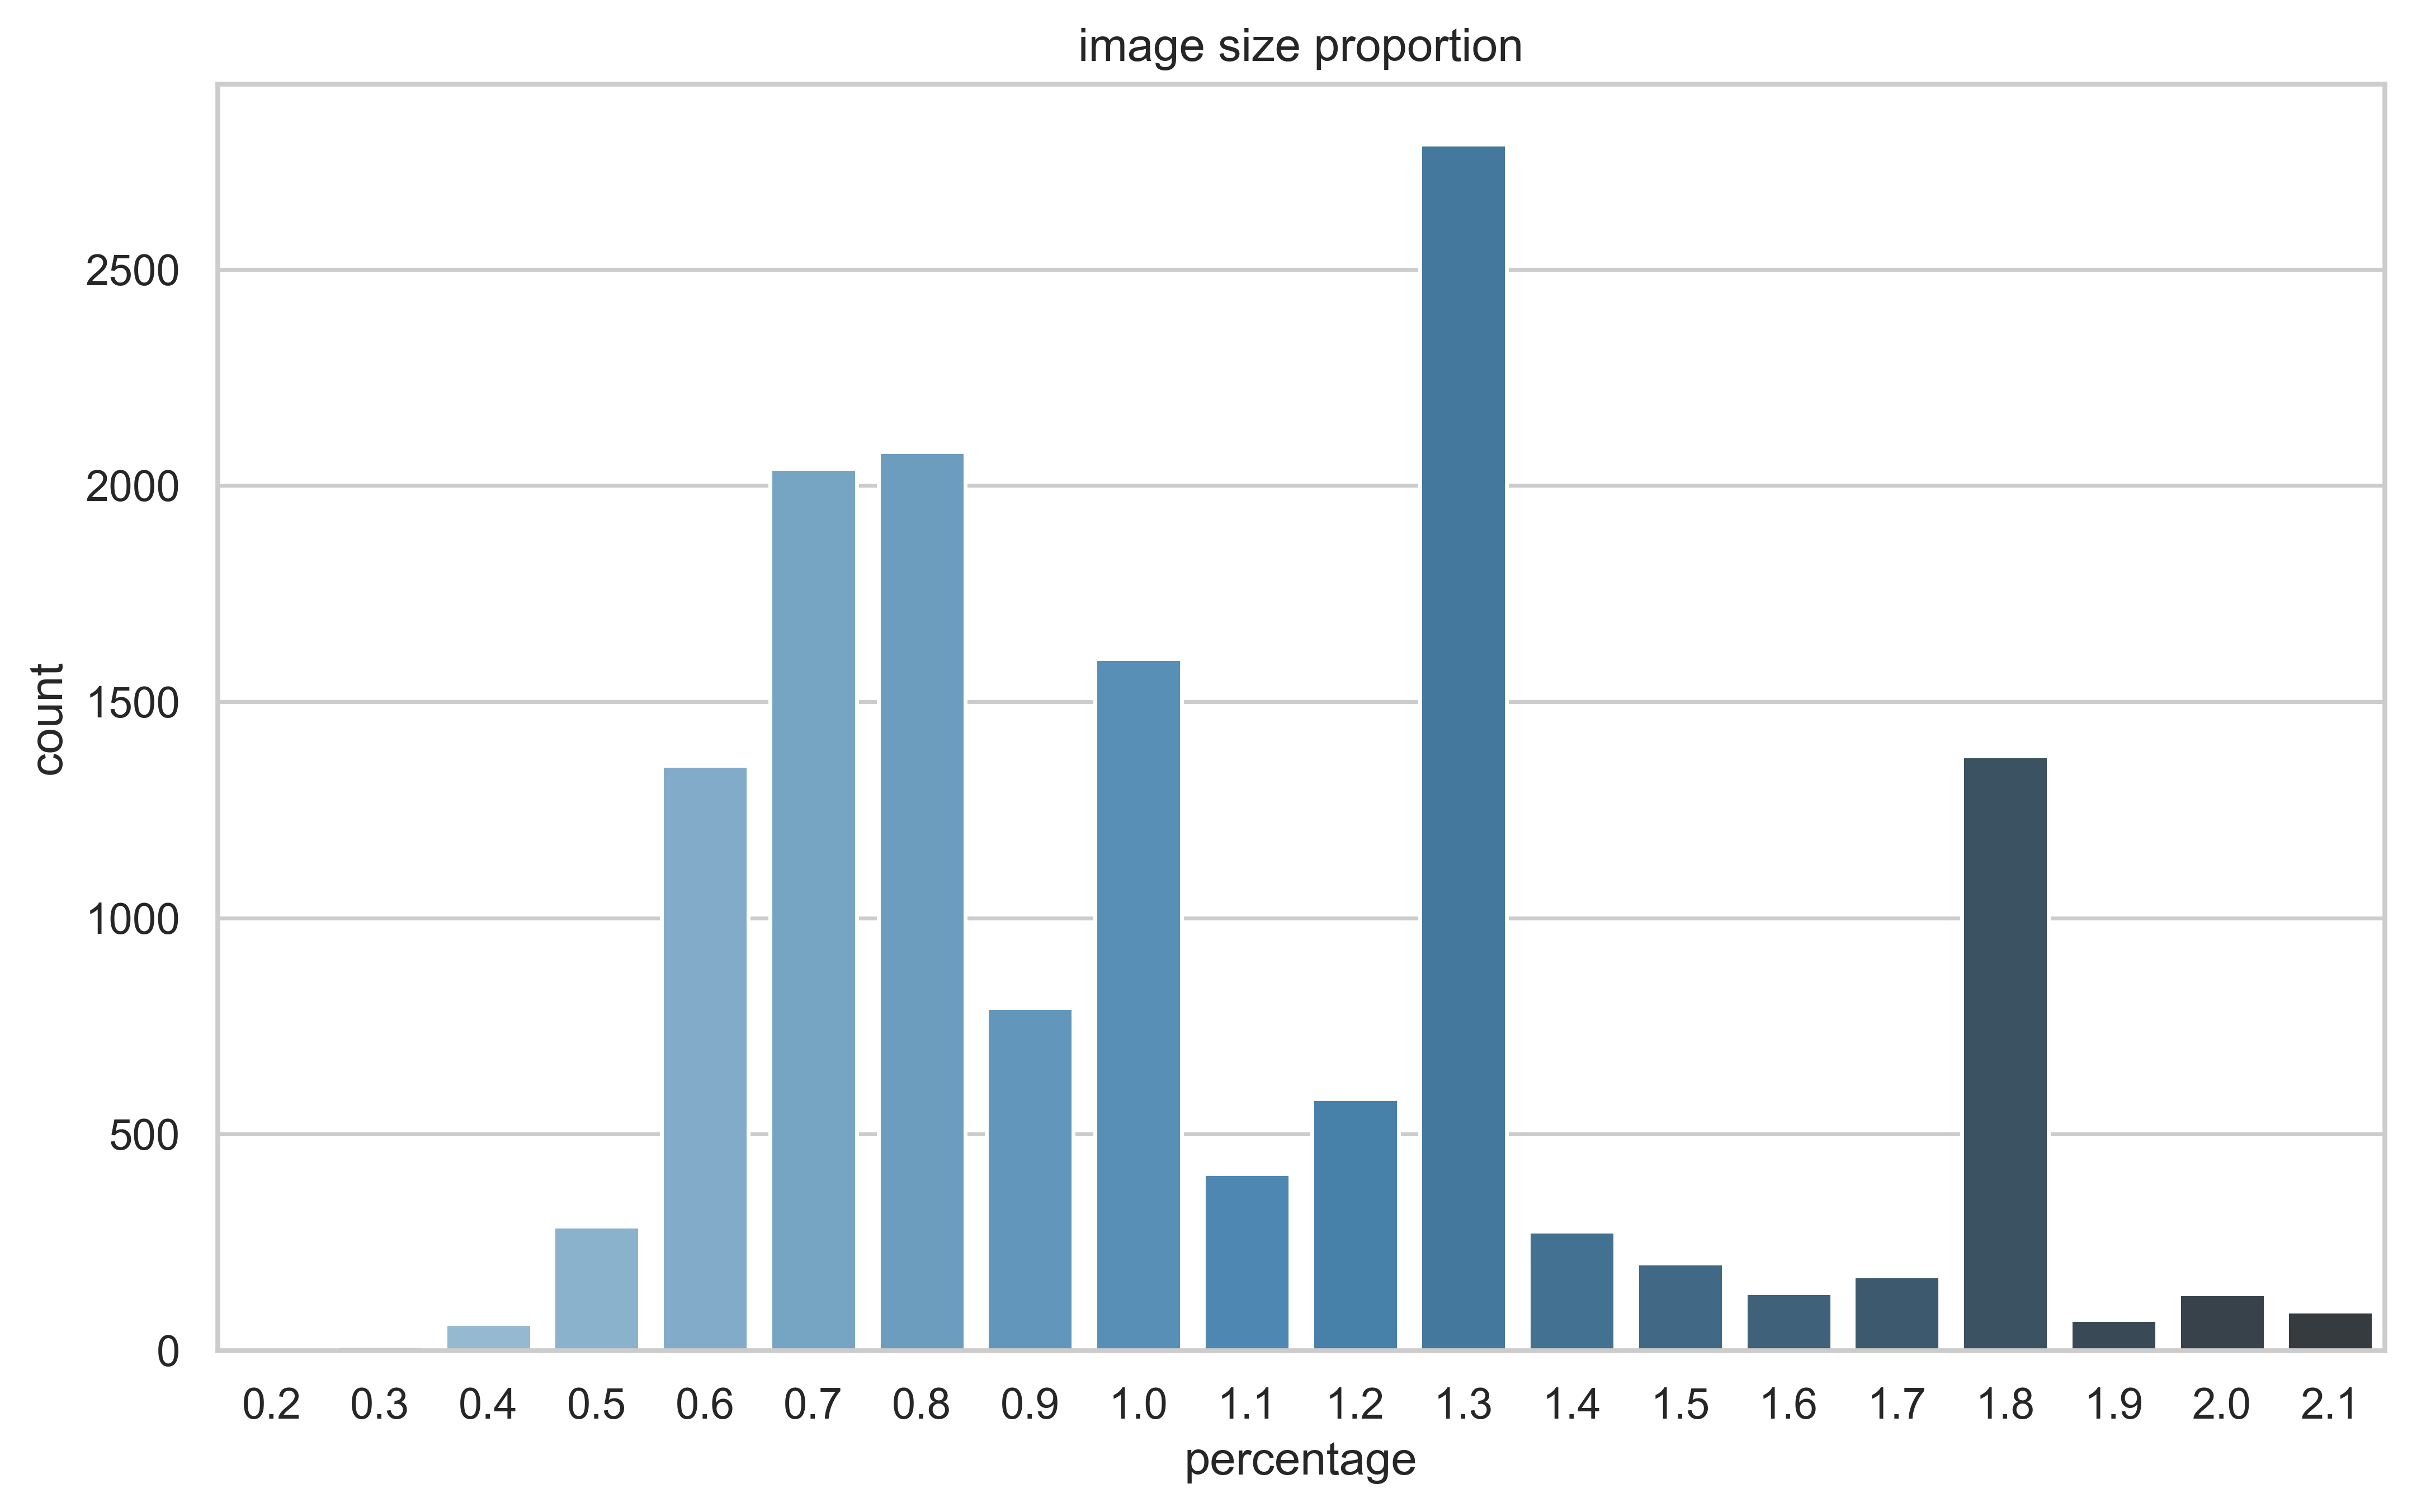

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

l1 = [str(x)+' ' for x in list(sorted_dict.keys())]
sns.set(style="whitegrid")  # 设置绘图样式
plt.figure(figsize=(10, 6),dpi=500)  # 设置图形大小
sns.barplot(x=list(sorted_dict.keys())[0:20], y=list(sorted_dict.values())[0:20], palette="Blues_d")  # 创建条形图

# 添加标签和标题
plt.xlabel("percentage")
plt.ylabel("count")
plt.title("image size proportion")


#plt.xticks(rotation=45)  # 设置标签旋转角度
#plt.xticks(list(sorted_dict.keys()))
#plt.tight_layout()
# 显示图形
plt.show()


In [7]:
image = Image.open('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\bowl.jpg' )  # 打开图像文件
image.show()

In [33]:
from PIL import Image
class Resize(object):
    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation

    def __call__(self, img):
        # 计算纵横比
        ratio = self.size[0] / self.size[1]
        w, h = img.size

        if w / h < ratio:
            # 如果图像的宽高比小于目标纵横比，执行以下操作
            t = int(h * ratio)
            w_padding = (t - w) // 2
            img = img.crop((-w_padding, 0, w+w_padding, h))
        else:
            # 如果图像的宽高比大于目标纵横比，执行以下操作
            t = int(w / ratio)
            h_padding = (t - h) // 2
            img = img.crop((0, -h_padding, w, h+h_padding))

        # 调整图像大小
        img = img.resize(self.size, self.interpolation)

        return img


# 示例调用
resize = Resize((224, 224))  # 创建Resize对象，设置目标大小
image = Image.open('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\bowl.jpg' )  # 打开图像文件
image.show()
resized_image = resize(image)  # 调整图像大小
resized_image.show()
#resized_image.show()

In [43]:
image_width, image_height = image.size
resized_width, resized_height = resized_image.size

# 计算画布的宽度和高度，以容纳两张图片
canvas_width = image_width + resized_width+20
canvas_height = max(image_height, resized_height)+50

# 创建一个新的画布，大小为两张图片的总宽度和较高的高度
canvas = Image.new("RGB", (canvas_width, canvas_height), color="white")

# 将第一张图片（image）粘贴到画布的左侧
canvas.paste(image, (0, 0))

# 将第二张图片（resized_image）粘贴到画布的右侧
canvas.paste(resized_image, (image_width+20, 0))

# 显示合并后的画布
draw = ImageDraw.Draw(canvas)
font = ImageFont.truetype("arial.ttf", 20) # 使用默认字体
title_text_1 = "original image"  # 替换为第一张图片的标题文本
text_width, text_height = draw.textsize(title_text_1, font)
text_x = (image_width - text_width) // 2
text_y = image_height + 10  # 将标题放在第一张图片正下方
draw.text((text_x, text_y), title_text_1, fill="black", font=font)

# 添加标题到第二张图片的下方
title_text_2 = "resized image"  # 替换为第二张图片的标题文本
text_width, text_height = draw.textsize(title_text_2, font)
text_x = image_width + 20 + (resized_width - text_width) // 2
text_y = resized_height + 10  # 将标题放在第二张图片正下方
draw.text((text_x, text_y), title_text_2, fill="black", font=font)

# 显示合并后的画布
canvas.show()






In [44]:
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageFont
enhancer = ImageEnhance.Contrast(resized_image)

# 增强图像的对比度
enhanced_image = enhancer.enhance(1.5)
enhanced_image.show()
blurred_image = resized_image.filter(ImageFilter.GaussianBlur(radius=5))
blurred_image.show()
horizontal_flip = resized_image.transpose(Image.FLIP_LEFT_RIGHT)
horizontal_flip.show()

In [ ]:
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageFont

canvas_width = 800
canvas_height = 600
canvas= Image.new("RGB", (canvas_width, canvas_height),(255, 255, 255))

titles = ["resized", "enhanced", "blurred",'horizontal_flip']
font = ImageFont.truetype("arial.ttf", 20)  # 选择字体和字号

draw = ImageDraw.Draw(canvas)
# 设置每张图像的位置

image_width, image_height = resized_image.size
horizontal_margin = (canvas_width - 2 * image_width) // 3
vertical_margin = 50


for i, (image, title) in enumerate(zip([resized_image, enhanced_image, blurred_image, horizontal_flip], titles)):
    x = horizontal_margin + i % 2 * (image_width + horizontal_margin)
    y = vertical_margin + i // 2 * (image_height + vertical_margin)
    
    # 在画布上粘贴图片
    canvas.paste(image, (x, y))
    
    # 添加标题文本
    text_x = x + (image_width - font.getsize(title)[0]) // 2  # 计算文本居中的x坐标
    text_y = y + image_height + 5
    draw.text((text_x, text_y), title, fill="black", font=font)

canvas.show()

In [ ]:
base_folder = "resized_dataset"

# 创建40个文件夹
for i in range(40):
    folder_name = str(i)
    folder_path = os.path.join(base_folder, folder_name)
    
    # 检查文件夹是否已存在，如果不存在则创建
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    

In [ ]:
import shutil
import numpy as np
import pandas as pd
import glob
import os
from PIL import Image
folder_path = 'C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\train_data'  # 请将'/your/folder/path'替换为您要操作的文件夹的实际路径

files = [file for file in os.listdir(folder_path)]

percentage = []
dic = {}
# 遍历.jpg文件并获取尺寸
for file in files:
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(".jpg"):
        label = df[df['image_name']==file]['label'].values
        label = label[0]
        with Image.open(file_path) as img:
            print(file.split('.')[0])
            print('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\rubbish_data'+'\\'+label+'\\'+file.split('.')[0]+'_resized'+'.jpg')
            resized_image = resize(img)
            enhancer = ImageEnhance.Brightness(resized_image)
            enhanced_image = enhancer.enhance(1.3)
            filtered_image = resized_image.filter(ImageFilter.SHARPEN)
            flipped_image_horizontal = resized_image.transpose(Image.FLIP_LEFT_RIGHT)
            resized_image.save('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\rubbish_data'+'\\'+label+'\\'+file.split('.')[0]+'_resized'+'.jpg')
            enhanced_image.save('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\rubbish_data'+'\\'+label+'\\'+file.split('.')[0]+'_enhanced'+'.jpg')
            filtered_image.save('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\rubbish_data'+'\\'+label+'\\'+file.split('.')[0]+'_filtered'+'.jpg')
            flipped_image_horizontal.save('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\rubbish_data'+'\\'+label+'\\'+file.split(',')[0]+'_flipped'+'.jpg')


In [ ]:
import pandas as pd
folder_path = 'C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\train_data'
files = [file for file in os.listdir(folder_path)]
dic = {'image_name':[],'label':[]}
for file in files:
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(".txt"):
        with open(file_path, 'r') as file:
            first_line = file.readline().strip()  # 读取第一行并去除换行符
            tmp = first_line.split(',')
            dic['image_name'].append(tmp[0].strip())
            dic['label'].append(tmp[1].strip())
df = pd.DataFrame(dic)
        
    
    

In [ ]:
import shutil
import numpy as np
import pandas as pd
import glob
import os
from PIL import Image
import pandas as pd
folder_path = 'C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\train_data'  

files = [file for file in os.listdir(folder_path)]

percentage = []
dic = {}
# 遍历.jpg文件并获取尺寸
for file in files:
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(".jpg"):
        label = df[df['image_name']==file]['label'].values
        label = label[0]
        with Image.open(file_path) as img:
            print(file.split('.')[0])
            print('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\resized_dataset'+'\\'+label+'\\'+file.split('.')[0]+'_resized'+'.jpg')
            resized_image = resize(img)
            resized_image.save('C:\\Users\\Administrator\\Desktop\\垃圾分类\\data\\garbage_classify\\resized_dataset'+'\\'+label+'\\'+file.split('.')[0]+'_resized'+'.jpg')
            

In [ ]:
df['label'].unique()